In [1]:
#from __future__ import print_function
import numpy as np
#import mdtraj as md
import pandas as pd
#import h5py
from matplotlib.pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

## Simulated annealing saturated lipids - dev_v14

In [2]:
def calc_Tm(T_quench,T_heat):
    T_quench_mean = np.mean(T_quench)
    T_quench_std = np.std(T_quench,ddof=1) #Bessel's correction
    
    T_heat_mean = np.mean(T_heat)
    T_heat_std = np.std(T_heat,ddof=1) #Bessel's correction
    
    Tm = T_quench_mean + T_heat_mean - np.sqrt(T_quench_mean*T_heat_mean) 
    
    d_dT_quench = 1 - T_heat_mean/(2*np.sqrt(T_quench_mean*T_heat_mean))
    d_dT_heat = 1 - T_quench_mean/(2*np.sqrt(T_quench_mean*T_heat_mean))
    
    Tm_err = np.sqrt(np.power(d_dT_quench,2)*np.power(T_quench_std,2)+np.power(d_dT_heat,2)*np.power(T_heat_std,2)) #Standard error propegation
    
    return T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err

In [3]:
exp_Tm_dspc = 328.15

In [4]:
T_quench = np.flip(np.arange(273,373,1))
T_heat = np.arange(274,374,1)

In [5]:
mol = "dspc"
exp_Tm = 314.15
n_rep = 1

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

data = np.loadtxt("/data2/lisbeth_is_awesome/STEROLS/TMs/DSPC_100_CHOL_0_box_10_10/DSPC_100_CHOL_0_box_10_10.txt")
quench = np.stack((T_quench,data[0:100]))
quench_list.append(quench)
heat = np.stack((T_heat,data[100:]))
heat_list.append(heat)
    
Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
Tquench_list.append(Tquench)
    
Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[291.0] [323.0]
307.41722161869563 nan
291.0 nan
323.0 nan


/softwares/Anaconda3/2021.11/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/softwares/Anaconda3/2021.11/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(200,)
(200,)
(200,)
[289.0, 289.0, 290.0] [338.0, 319.0, 332.0]
310.1577173449925 5.170041952582329
289.3333333333333 0.5773502691896258
329.6666666666667 9.71253485622231


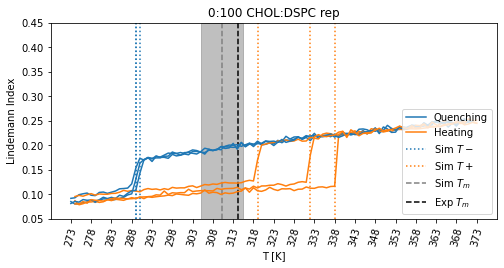

In [22]:
mol = "dspc"
exp_Tm = 314.15
n_rep = 5

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []


for i in np.arange(3,n_rep+1,1):
    data = np.loadtxt("/data2/lisbeth_is_awesome/STEROLS/TMs/REPS/DSPC_100_CHOL_0_box_15_15_rep{0}/DSPC_100_CHOL_0_box_15_15_rep{0}.txt".format(i))
    print (data.shape)
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)



f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep-2):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("0:100 CHOL:DSPC rep")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_CHOL-DSPC_0-100.png",dpi=300)
plt.show()

In [33]:
pwd

'/data2/lisbeth_is_awesome/STEROLS/TMs'

[294.0, 281.0, 291.0, 292.0, 312.0] [323.0, 315.0, 315.0, 316.0, 316.0]
305.71652517700863 5.686435733172214
294.0 11.247221879201993
317.0 3.391164991562634


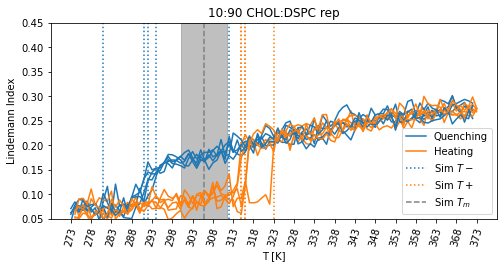

In [23]:
mol = "dspc"
exp_Tm = 314.15
n_rep = 5

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []


for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("/data2/lisbeth_is_awesome/STEROLS/TMs/REPS/DSPC_90_CHOL_10_box_15_15_rep{0}/DSPC_90_CHOL_10_box_15_15_rep{0}.txt".format(i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)


f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
#ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("10:90 CHOL:DSPC rep")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_CHOL-DSPC_10-90.png",dpi=300)
plt.show()

[294.0, 273.0, 284.0, 273.0, 286.0] [302.0, 304.0, 289.0, 300.0, 302.0]
290.8302149224734 5.351743882753795
282.0 9.027735042633894
299.4 5.9833101206606365


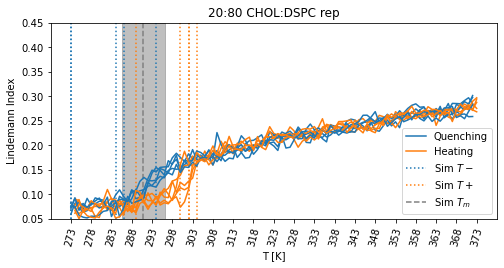

In [24]:
mol = "dspc"
exp_Tm = 314.15
n_rep = 5

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []


for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("/data2/lisbeth_is_awesome/STEROLS/TMs/REPS/DSPC_80_CHOL_20_box_15_15_rep{0}/DSPC_80_CHOL_20_box_15_15_rep{0}.txt".format(i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)


f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
#ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("20:80 CHOL:DSPC rep")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_CHOL-DSPC_20-80.png",dpi=300)
plt.show()

###  Roberto with CHOL in DPPC old version

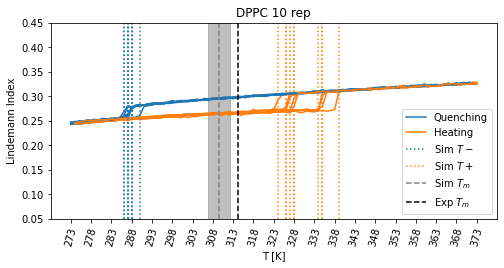

In [58]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DPPC 10 rep")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dppc_dev14.png",dpi=300)
plt.show()

In [59]:
print(Tm, Tm_err)

309.5424079818839 2.7607567650501275


In [60]:
### End Test DPPC 10 repetitions ###

In [61]:
### Begin Test CHOL 10 repetitions ###

In [62]:
mol = "dppc"
exp_Tm = 314.15
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("../../../sterols/test_lindemann/index_test/chol/10x10/data_r{}.dat".format(i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[292.0, 292.0, 292.0, 291.0, 292.0, 295.0, 291.0, 294.0, 293.0, 294.0] [328.0, 318.0, 331.0, 312.0, 329.0, 320.0, 322.0, 323.0, 325.0, 320.0]
308.0707303233225 3.0605344596898902
292.6 1.3498971154211057
322.8 5.7115866641610396


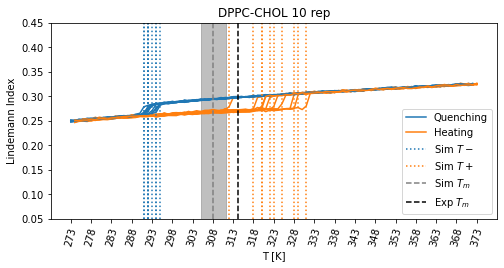

In [63]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DPPC-CHOL 10 rep")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dppc_dev14.png",dpi=300)
plt.show()

In [64]:
print(Tm, Tm_err)

308.0707303233225 3.0605344596898902


In [65]:
### End Test CHOL 10 repetitions ###

In [66]:
### Begin Test CHOL 1 repetitions hexagonal ###